In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from functions import model as m
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
white = pd.read_csv('wines/WineQuality-WhiteWine.csv')
red = pd.read_csv('wines/WineQuality-WhiteWine.csv')

In [3]:
white['white'] = 1
white['red'] = 0
red['white'] = 0
red['red'] = 1

In [4]:
df = pd.concat([white, red], ignore_index = True)

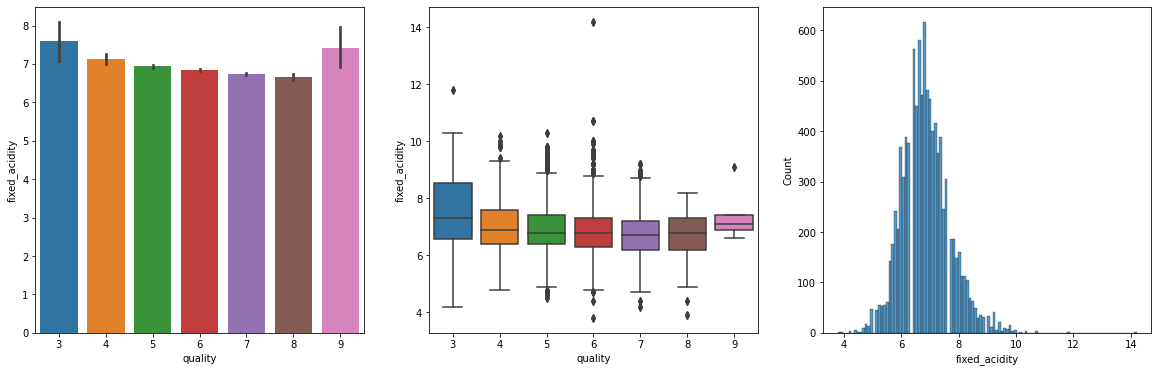

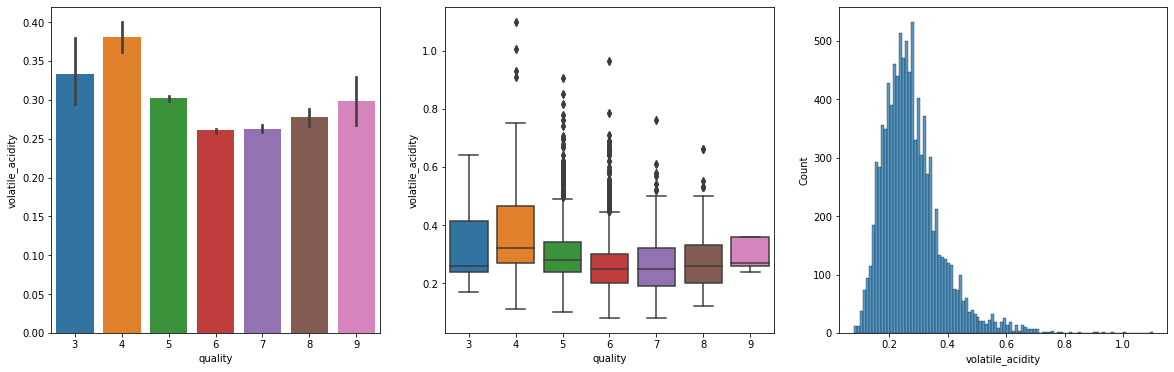

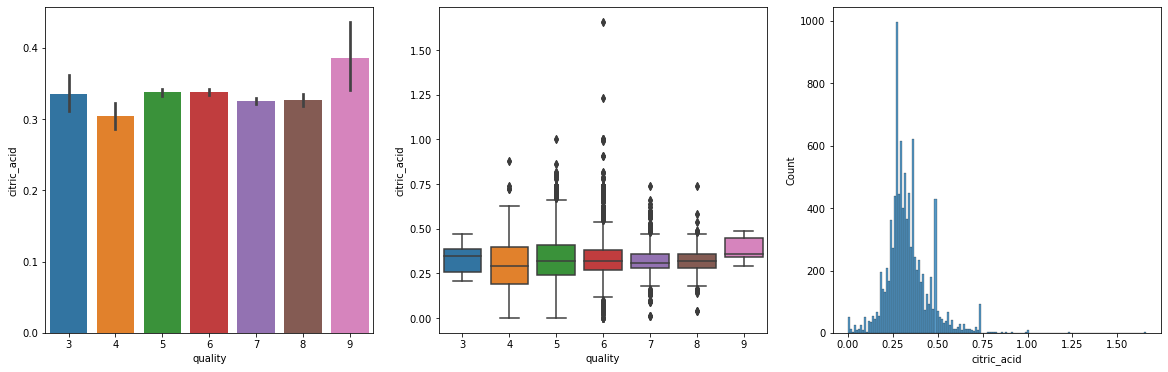

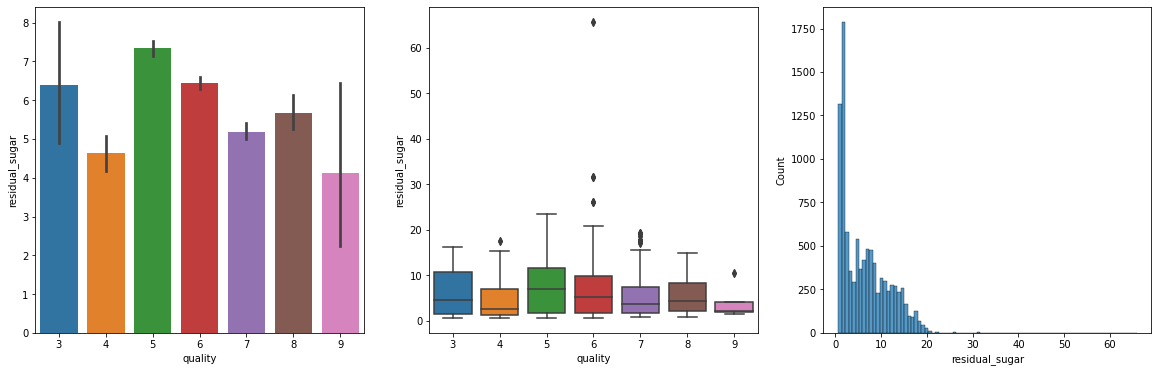

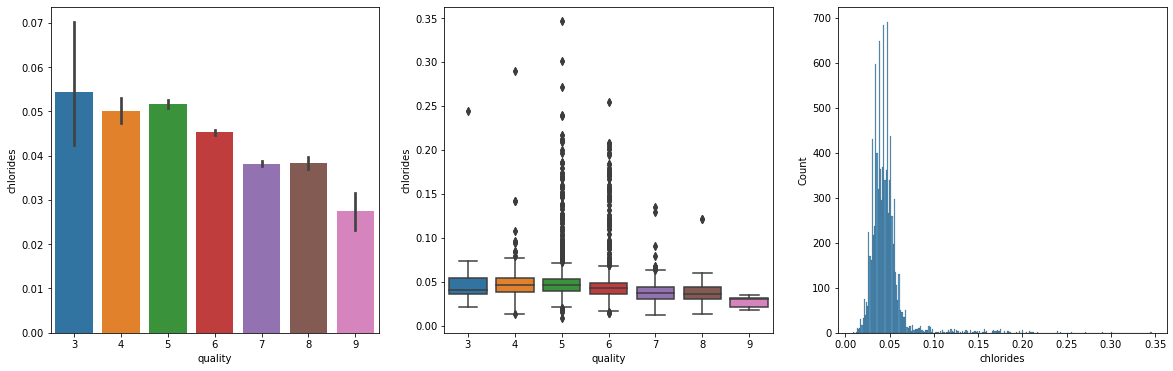

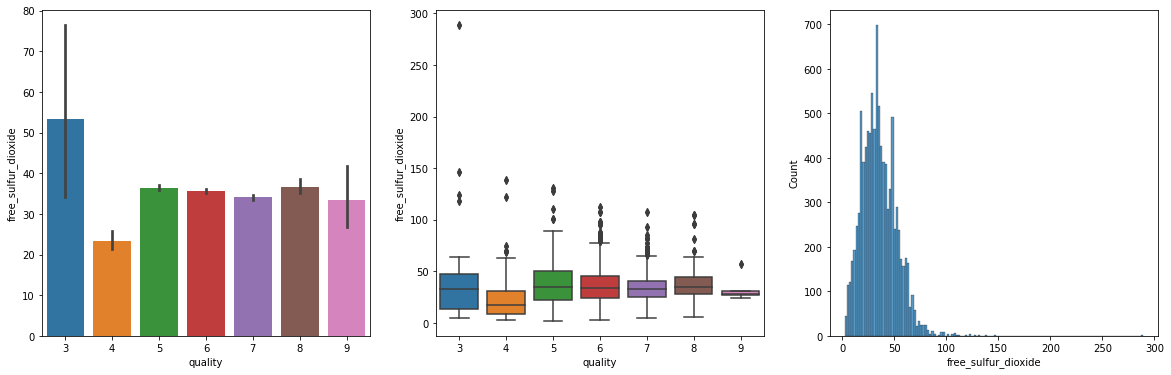

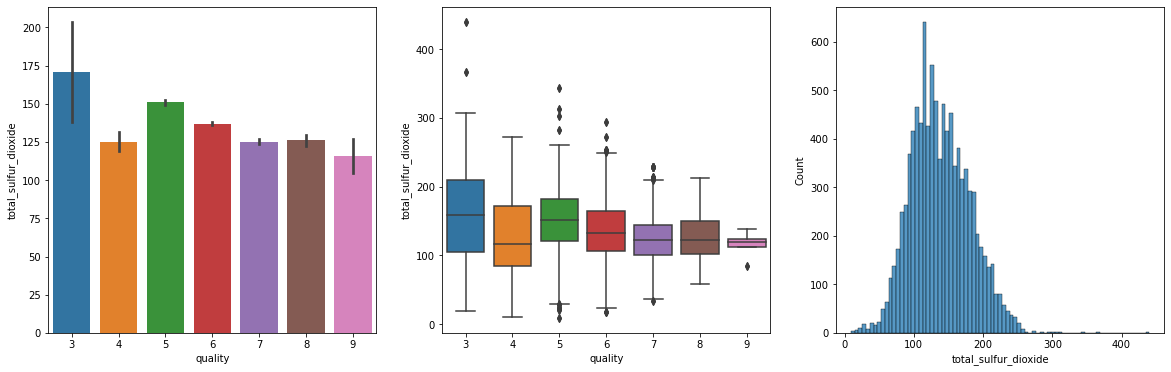

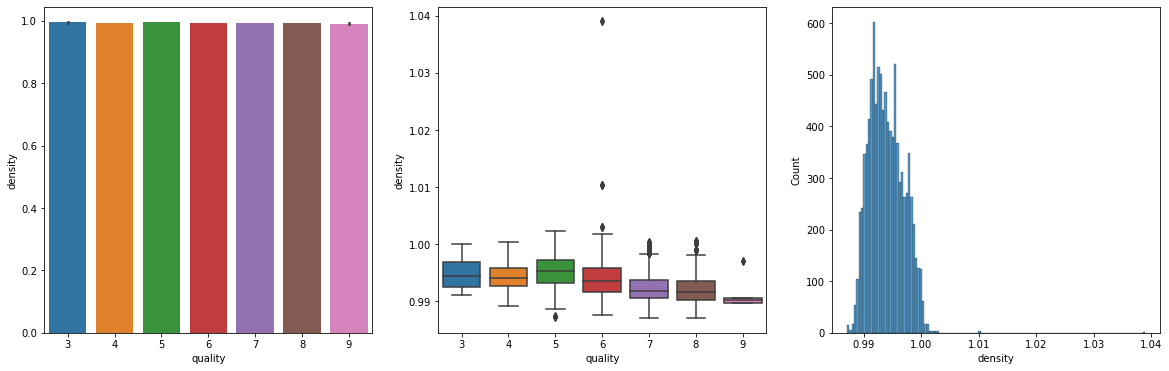

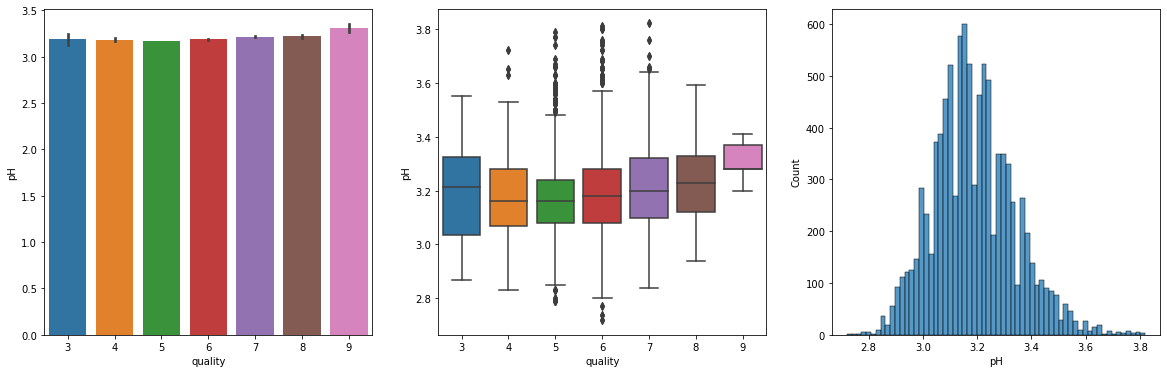

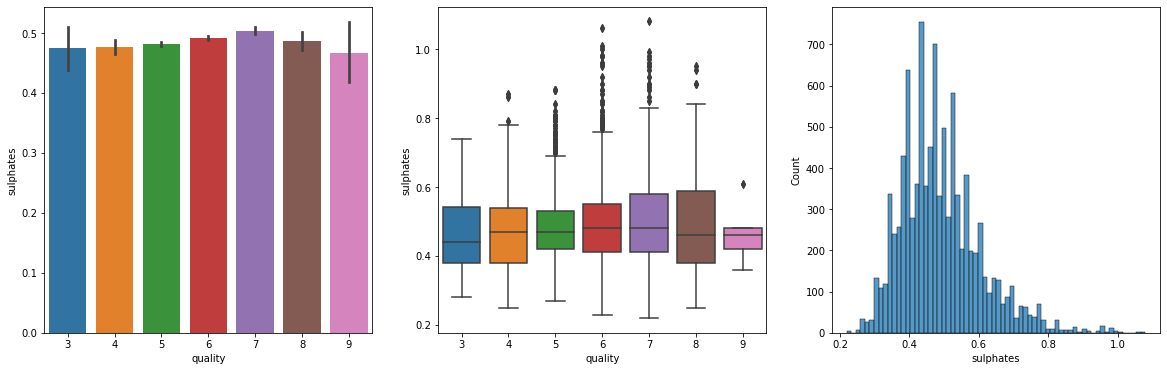

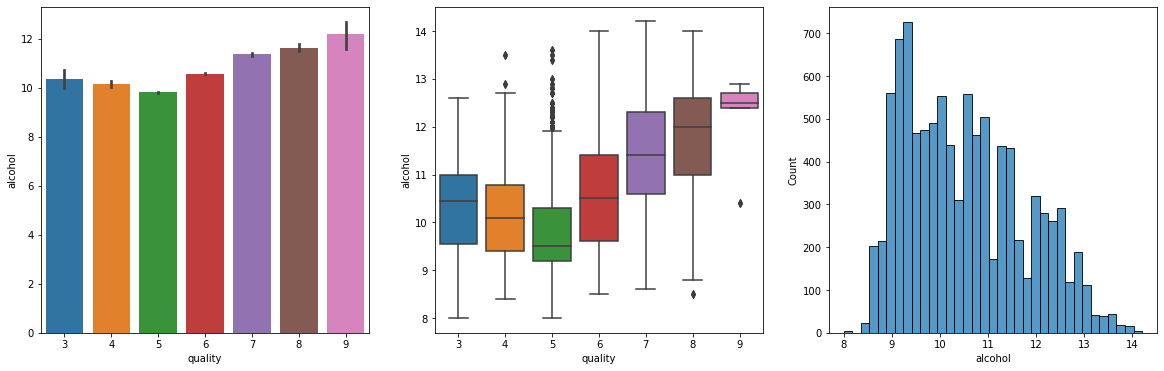

In [5]:
for column in df.iloc[:, :-3]:
    fig, ax = plt.subplots(1,3, figsize=(20, 6))
    sns.barplot(data=df, x='quality', y=column, ax=ax[0])
    sns.boxplot(data=df, x='quality', y=column, ax=ax[1])
    sns.histplot(data=df, x=column, ax=ax[2])
    plt.show()

In [6]:
y = df[['quality']]
x = df.drop(['quality'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=16)

In [7]:
m(x_train, x_test, y_train, y_test)

Train Mean Square Error: 0.5607671699351013
Test Mean Square Error: 0.5733356746024661
Train Root Mean Square Error: 0.7488438888948092
Test Root Mean Square Error: 0.7571893254678556


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     252.7
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:16:22   Log-Likelihood:                -8852.4
No. Observations:                7836   AIC:                         1.773e+04
Df Residuals:                    7823   BIC:                         1.782e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              109.2157     10.492     10.409      0.000      88.648     129.783
fixed_acidity            0.0738      0.017      4.343      0.000       0.041       0.107
volatile_acidity        -1.8433      0.091    -20.341      0.000      -2.021      -1.666
citric_acid              0.0631      0.075      0.841      0.400      -0.084       0.210
residual_sugar           0.0869      0.006     14.036      0.000       0.075       0.099
chlorides               -0.2068      0.426     -0.485      0.627      -1.042       0.629
free_sulfur_dioxide      0.0038      0.001      5.663      0.000       0.002       0.005
total_sulfur_dioxide    -0.0004      0.000     -1.179      0.238      -0.001       0.000
density               -164.0646     15.961    -10.279      0.000    -195.352    -132.777
pH                       0.7283      0.085      8.544      0.000       0.561       0.895
sulphates                0.6585      0.080      8.253      0.000       0.502       0.815
alcohol                  0.1756      0.020      8.696      0.000       0.136       0.215
white                   54.6124      5.246     10.410      0.000      44.329      64.896
red                     54.6033      5.246     10.408      0.000      44.320      64.887
==============================================================================
Omnibus:                      164.098   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              348.036
Skew:                           0.069   Prob(JB):                     2.66e-76
Kurtosis:                       4.023   Cond. No.                     8.95e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.21e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Iteration 1

The goal of iteration 1 is to improve the insignificant p-values from our first model--citric acid and chlorides.

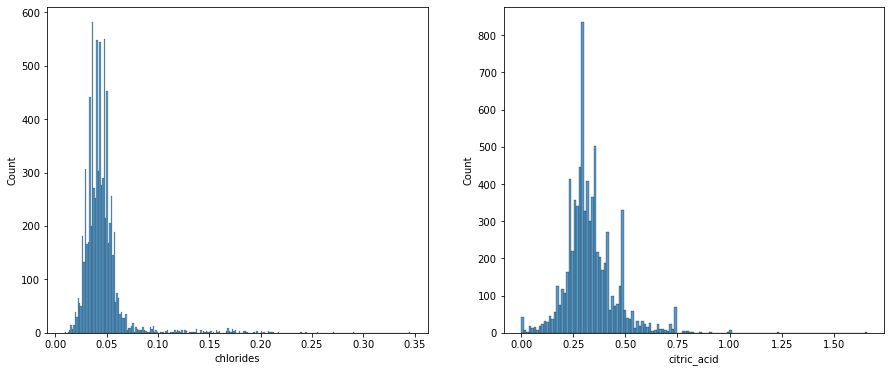

In [8]:
fig, ax = plt.subplots(1,2, figsize=(15, 6))
sns.histplot(data=x_train, x='chlorides', ax=ax[0])
sns.histplot(data=x_train, x='citric_acid', ax=ax[1]);

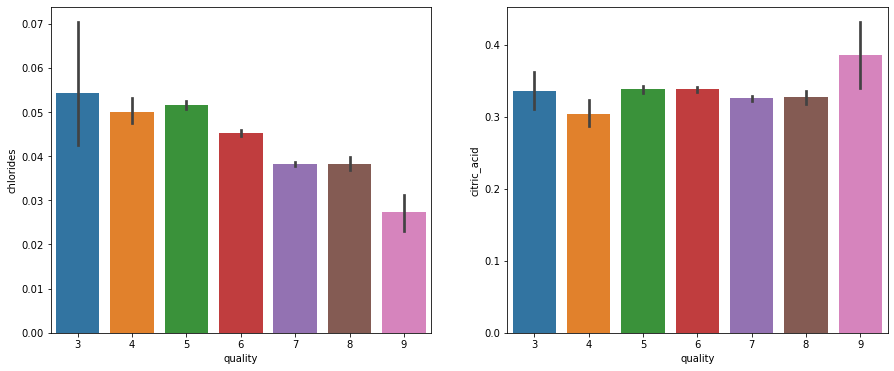

In [9]:
fig, ax = plt.subplots(1,2, figsize=(15, 6))
sns.barplot(data=df, x='quality', y='chlorides', ax=ax[0])
sns.barplot(data=df, x='quality', y='citric_acid', ax=ax[1]);

Chlorides seems to have a fairly linear relationship with quality, but the distribution is slightly skewed, so we will use a log transformation to help normalize the distribution.
Citric acid has a more normal distribution and a less linear relationship to quality. It's a bit hard to tell, but the relationship sort of resembles a parabola, so we will try taking the square root of that column.

In [10]:
x_train['chlorides'] = x_train['chlorides'].map(lambda x: np.log(x))
x_train['citric_acid'] = x_train['citric_acid'].map(lambda x: np.sqrt(x))

In [11]:
x_test['chlorides'] = x_test['chlorides'].map(lambda x: np.log(x))
x_test['citric_acid'] = x_test['citric_acid'].map(lambda x: np.sqrt(x))

In [12]:
m(x_train, x_test, y_train, y_test)

Train Mean Square Error: 0.5602221881883387
Test Mean Square Error: 0.5731518094746438
Train Root Mean Square Error: 0.7484799183600979
Test Root Mean Square Error: 0.7570679028162823


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     253.6
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:16:27   Log-Likelihood:                -8848.6
No. Observations:                7836   AIC:                         1.772e+04
Df Residuals:                    7823   BIC:                         1.781e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              107.7441     10.551     10.211      0.000      87.061     128.428
fixed_acidity            0.0670      0.017      3.935      0.000       0.034       0.100
volatile_acidity        -1.7986      0.092    -19.621      0.000      -1.978      -1.619
citric_acid              0.2170      0.086      2.520      0.012       0.048       0.386
residual_sugar           0.0857      0.006     13.803      0.000       0.074       0.098
chlorides               -0.0493      0.030     -1.618      0.106      -0.109       0.010
free_sulfur_dioxide      0.0037      0.001      5.633      0.000       0.002       0.005
total_sulfur_dioxide    -0.0004      0.000     -1.219      0.223      -0.001       0.000
density               -162.0150     16.031    -10.106      0.000    -193.441    -130.589
pH                       0.7270      0.085      8.556      0.000       0.560       0.894
sulphates                0.6499      0.080      8.149      0.000       0.494       0.806
alcohol                  0.1715      0.020      8.483      0.000       0.132       0.211
white                   53.8764      5.276     10.212      0.000      43.535      64.218
red                     53.8677      5.276     10.211      0.000      43.526      64.209
==============================================================================
Omnibus:                      166.114   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              353.544
Skew:                           0.071   Prob(JB):                     1.69e-77
Kurtosis:                       4.031   Cond. No.                     1.50e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.86e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Iteration 2

We have improved the p value for chlorides to an acceptable level, but citric acid remains insignificant, so we will drop that value. In this iteration we will check for collinearity issues.

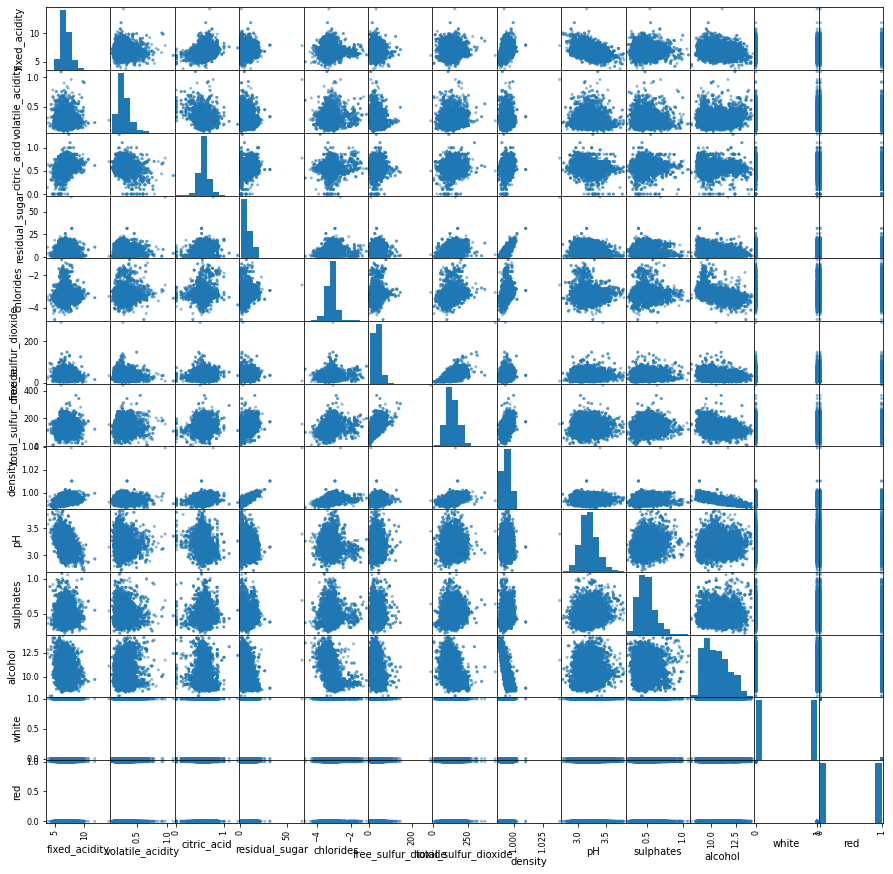

In [13]:
pd.plotting.scatter_matrix(x_train, figsize  = [15, 15]);

In [14]:
abs(x_train.corr()) >= 0.75

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,white,red
fixed_acidity,True,False,False,False,False,False,False,False,False,False,False,False,False
volatile_acidity,False,True,False,False,False,False,False,False,False,False,False,False,False
citric_acid,False,False,True,False,False,False,False,False,False,False,False,False,False
residual_sugar,False,False,False,True,False,False,False,True,False,False,False,False,False
chlorides,False,False,False,False,True,False,False,False,False,False,False,False,False
free_sulfur_dioxide,False,False,False,False,False,True,False,False,False,False,False,False,False
total_sulfur_dioxide,False,False,False,False,False,False,True,False,False,False,False,False,False
density,False,False,False,True,False,False,False,True,False,False,True,False,False
pH,False,False,False,False,False,False,False,False,True,False,False,False,False
sulphates,False,False,False,False,False,False,False,False,False,True,False,False,False


The plot shows that density has a high correlation with both alcohol and residual sugars, so we will drop density as well.

In [15]:
x_train.drop(['density'], axis=1, inplace=True)
x_test.drop(['density'], axis=1, inplace=True)

In [16]:
m(x_train, x_test, y_train, y_test)

Train Mean Square Error: 0.5675363065212523
Test Mean Square Error: 0.5780234608501033
Train Root Mean Square Error: 0.7533500557650821
Test Root Mean Square Error: 0.7602785416214923


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     264.0
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:16:57   Log-Likelihood:                -8899.4
No. Observations:                7836   AIC:                         1.782e+04
Df Residuals:                    7824   BIC:                         1.791e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1258      0.183      6.164      0.000       0.768       1.484
fixed_acidity           -0.0583      0.012     -4.968      0.000      -0.081      -0.035
volatile_acidity        -1.8867      0.092    -20.544      0.000      -2.067      -1.707
citric_acid              0.1678      0.087      1.940      0.052      -0.002       0.337
residual_sugar           0.0263      0.002     13.031      0.000       0.022       0.030
chlorides               -0.1091      0.030     -3.625      0.000      -0.168      -0.050
free_sulfur_dioxide      0.0048      0.001      7.200      0.000       0.003       0.006
total_sulfur_dioxide    -0.0010      0.000     -3.337      0.001      -0.002      -0.000
pH                       0.1736      0.065      2.655      0.008       0.045       0.302
sulphates                0.4292      0.077      5.560      0.000       0.278       0.580
alcohol                  0.3527      0.009     37.570      0.000       0.334       0.371
white                    0.5672      0.092      6.181      0.000       0.387       0.747
red                      0.5586      0.092      6.093      0.000       0.379       0.738
==============================================================================
Omnibus:                      158.177   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              332.208
Skew:                           0.061   Prob(JB):                     7.28e-73
Kurtosis:                       4.001   Cond. No.                     2.24e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.51e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Iteration 3

In [17]:
x_train['total_sulfur_dioxide'] = x_train['total_sulfur_dioxide'].map(lambda x: np.log(x))
x_train['volatile_acidity'] = x_train['volatile_acidity'].map(lambda x: np.log(x))
x_train['residual_sugar'] = x_train['residual_sugar'].map(lambda x: np.log(x))
x_train['free_sulfur_dioxide'] = x_train['free_sulfur_dioxide'].map(lambda x: np.log(x))
x_train['sulphates'] = x_train['sulphates'].map(lambda x: np.log(x))

In [18]:
x_test['total_sulfur_dioxide'] = x_test['total_sulfur_dioxide'].map(lambda x: np.log(x))
x_test['volatile_acidity'] = x_test['volatile_acidity'].map(lambda x: np.log(x))
x_test['residual_sugar'] = x_test['residual_sugar'].map(lambda x: np.log(x))
x_test['free_sulfur_dioxide'] = x_test['free_sulfur_dioxide'].map(lambda x: np.log(x))
x_test['sulphates'] = x_test['sulphates'].map(lambda x: np.log(x))

In [19]:
m(x_train, x_test, y_train, y_test)

Train Mean Square Error: 0.5514450234101538
Test Mean Square Error: 0.5595869586473524
Train Root Mean Square Error: 0.7425934442278317
Test Root Mean Square Error: 0.7480554515858784


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     292.4
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:16:57   Log-Likelihood:                -8786.8
No. Observations:                7836   AIC:                         1.760e+04
Df Residuals:                    7824   BIC:                         1.768e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.4619      0.208      2.219      0.027       0.054       0.870
fixed_acidity           -0.0520      0.012     -4.498      0.000      -0.075      -0.029
volatile_acidity        -0.5534      0.027    -20.484      0.000      -0.606      -0.500
citric_acid              0.1801      0.085      2.125      0.034       0.014       0.346
residual_sugar           0.1362      0.011     12.618      0.000       0.115       0.157
chlorides               -0.1181      0.030     -3.978      0.000      -0.176      -0.060
free_sulfur_dioxide      0.2896      0.021     14.030      0.000       0.249       0.330
total_sulfur_dioxide    -0.1688      0.037     -4.512      0.000      -0.242      -0.095
pH                       0.1221      0.064      1.893      0.058      -0.004       0.248
sulphates                0.2035      0.039      5.220      0.000       0.127       0.280
alcohol                  0.3530      0.009     39.302      0.000       0.335       0.371
white                    0.2350      0.104      2.249      0.025       0.030       0.440
red                      0.2270      0.104      2.174      0.030       0.022       0.432
==============================================================================
Omnibus:                      154.908   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.178
Skew:                           0.112   Prob(JB):                     6.57e-66
Kurtosis:                       3.933   Cond. No.                     2.06e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.07e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

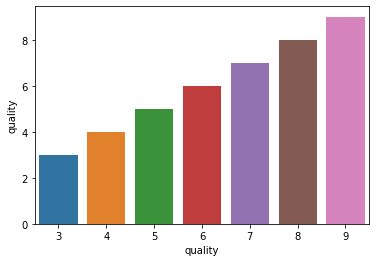

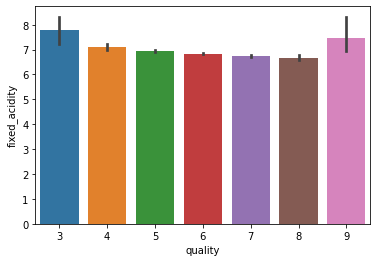

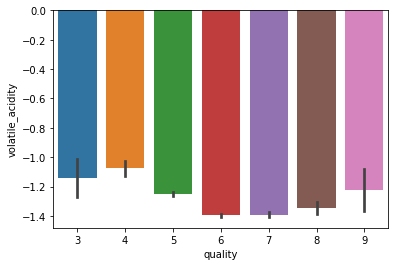

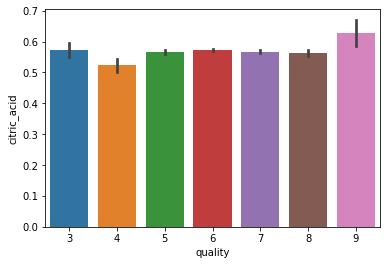

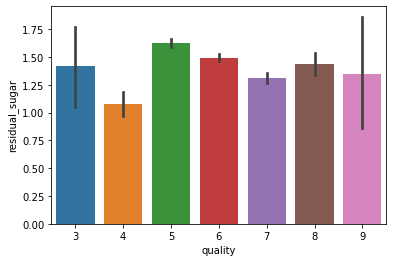

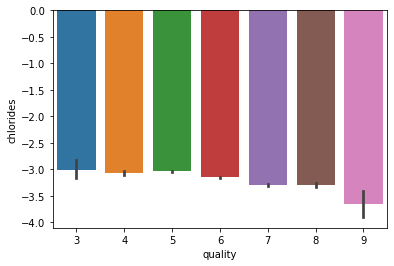

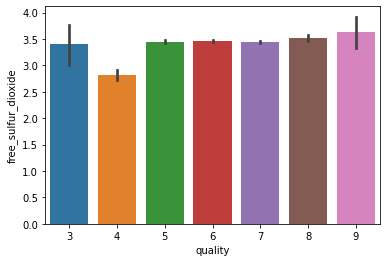

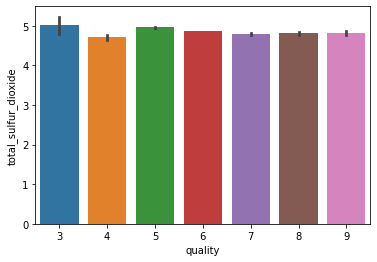

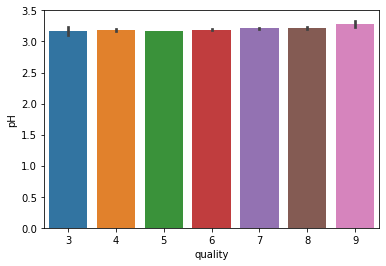

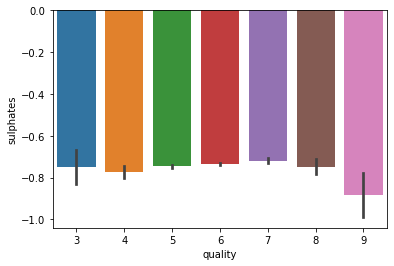

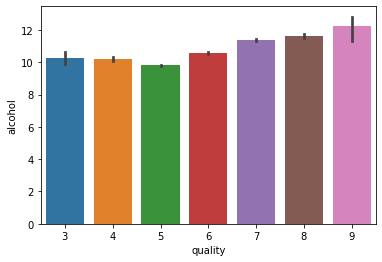

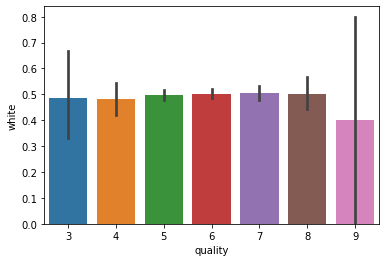

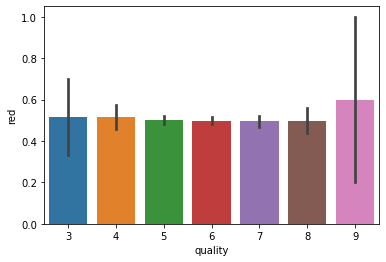

In [20]:
graph_df = y_train.join(x_train)
for column in graph_df:
    sns.barplot(data=graph_df, x='quality', y=column)
    plt.show()

## Iteration 4

In [21]:
x_train['fixed_acidity'] = x_train['fixed_acidity'].map(lambda x: np.log(x))
x_test['fixed_acidity'] = x_test['fixed_acidity'].map(lambda x: np.log(x))

In [22]:
m(x_train, x_test, y_train, y_test)

Train Mean Square Error: 0.5517682781433977
Test Mean Square Error: 0.5600048478085254
Train Root Mean Square Error: 0.7428110649037194
Test Root Mean Square Error: 0.748334716426096


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     291.8
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:17:11   Log-Likelihood:                -8789.1
No. Observations:                7836   AIC:                         1.760e+04
Df Residuals:                    7824   BIC:                         1.769e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.6136      0.235      2.609      0.009       0.153       1.075
fixed_acidity           -0.3188      0.081     -3.954      0.000      -0.477      -0.161
volatile_acidity        -0.5538      0.027    -20.487      0.000      -0.607      -0.501
citric_acid              0.1700      0.085      2.004      0.045       0.004       0.336
residual_sugar           0.1370      0.011     12.694      0.000       0.116       0.158
chlorides               -0.1160      0.030     -3.907      0.000      -0.174      -0.058
free_sulfur_dioxide      0.2915      0.021     14.125      0.000       0.251       0.332
total_sulfur_dioxide    -0.1708      0.037     -4.561      0.000      -0.244      -0.097
pH                       0.1337      0.065      2.064      0.039       0.007       0.261
sulphates                0.2040      0.039      5.232      0.000       0.128       0.280
alcohol                  0.3535      0.009     39.354      0.000       0.336       0.371
white                    0.3109      0.118      2.636      0.008       0.080       0.542
red                      0.3028      0.118      2.568      0.010       0.072       0.534
==============================================================================
Omnibus:                      154.961   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.002
Skew:                           0.108   Prob(JB):                     2.64e-66
Kurtosis:                       3.937   Cond. No.                     2.22e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.81e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Iteration 5: Ratios

In [39]:
df['percent_free_SO2'] = df['free_sulfur_dioxide'] / df['total_sulfur_dioxide']

In [40]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,white,red,percent_free_SO2
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1,0,0.264706
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1,0,0.106061
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1,0,0.309278
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1,0,0.252688
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1,0,0.252688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9791,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,1,0.260870
9792,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,1,0.339286
9793,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,1,0.270270
9794,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0,1,0.181818


In [41]:
percent = df[['percent_free_SO2']]

In [42]:
percent

,percent_free_SO2
0,0.264706
1,0.106061
2,0.309278
3,0.252688
4,0.252688
...,...
9791,0.260870
9792,0.339286
9793,0.270270
9794,0.181818


In [43]:
x_train.join(percent)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol,white,red,percent_free_SO2
7353,2.054124,-1.139434,0.574456,2.341806,-3.473768,3.850148,5.267858,3.07,-0.544727,9.6,0,1,0.242268
2915,1.931521,-1.966113,0.616441,0.000000,-3.194183,3.091042,4.394449,3.03,-0.616186,11.4,1,0,0.271605
4883,1.589235,-0.755023,0.412311,0.641854,-3.352407,4.094345,4.997212,3.27,-1.049822,11.5,1,0,0.405405
7568,1.774952,-1.078810,0.556776,0.693147,-3.506558,3.637586,4.955827,3.40,-0.891598,12.9,0,1,0.267606
9045,1.916923,-1.714798,0.591608,1.686399,-2.918771,3.970292,4.962845,3.10,-0.616186,11.0,0,1,0.370629
...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,1.774952,-1.966113,0.500000,1.504077,-3.611918,3.526361,4.941642,3.49,-0.673345,10.8,1,0,0.242857
1345,1.987874,-0.941609,0.608276,0.095310,-3.146555,3.583519,4.727388,3.39,-0.733969,12.7,1,0,0.318584
581,1.740466,-1.714798,0.469042,1.435085,-3.170086,3.218876,4.709530,3.35,-0.941609,9.4,1,0,0.225225
2169,2.001480,-1.660731,0.547723,2.549445,-2.937463,3.881564,5.433722,3.14,-0.713350,9.1,1,0,0.211790


In [ ]:
x_train.drop['free_sulfur_dioxide', 'total_sulfur_dioxide']